In [173]:
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [174]:
alpha = 0.01
K = 1000
B = 128
N = 512
n0, n1, n2, n3 = 1, 64, 64, 1
problem_2 = True

def f_true(x):
    return (x-2)*np.cos(4*x)

In [175]:
torch.manual_seed(0)
X_train = torch.normal(0.0, 1.0, (N,))
y_train = f_true(X_train) + torch.normal(0, 0.5, X_train.shape)
X_test = torch.normal(0.0, 1.0, (N//5,))
y_test = f_true(X_test)

# print(X_test)
# print(y_test)

In [176]:
train_dataloader = DataLoader(
    TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), 
    batch_size=B)
test_dataloader = DataLoader(
    TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), 
    batch_size=B)
"""
for batch_x, batch_y in test_dataloader:
    print(batch_x)
    print(batch_y)
"""

'\nfor batch_x, batch_y in test_dataloader:\n    print(batch_x)\n    print(batch_y)\n'

In [177]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear_sigmoid_stack = nn.Sequential(
            nn.Linear(n0, n1),
            nn.Sigmoid(),
            nn.Linear(n1, n2),
            nn.Sigmoid(),
            nn.Linear(n2, n3),
        )
        self.apply(self._init_weights)
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=1.0)
            if module.bias is not None:
                module.bias.data.fill_(0.03)
    def forward(self, x):
        x = self.linear_sigmoid_stack(x)
        return x

model = MLP().to(device)
print(model)
optimizer = optim.SGD(model.parameters(), lr=alpha)
loss = nn.MSELoss()

MLP(
  (linear_sigmoid_stack): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)


tensor([[-0.0531],
        [-0.2079]])
tensor([[-2.0000],
        [-1.2541]])


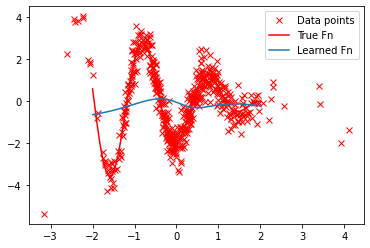

tensor([[-0.8930],
        [-0.7390]])
tensor([[-2.0000],
        [-1.2541]])


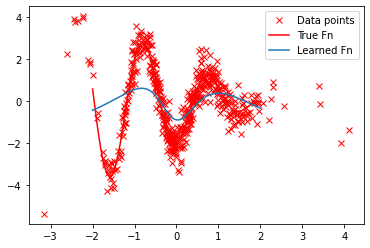

tensor([[-1.3086],
        [-0.9281]])
tensor([[-2.0000],
        [-1.2541]])


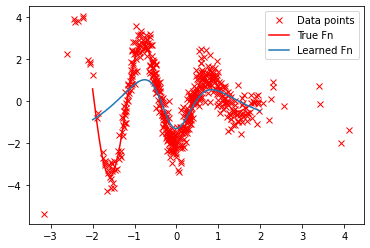

tensor([[-1.6356],
        [-1.0398]])
tensor([[-2.0000],
        [-1.2541]])


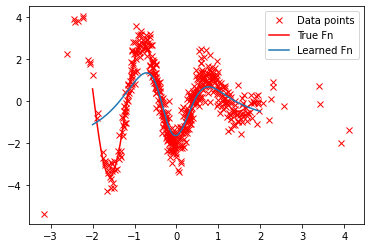

tensor([[-1.8476],
        [-1.0949]])
tensor([[-2.0000],
        [-1.2541]])


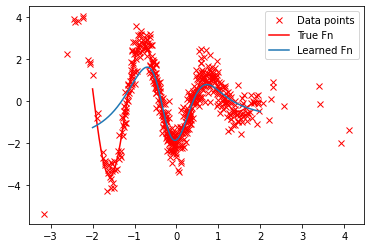

tensor([[-1.9584],
        [-1.1223]])
tensor([[-2.0000],
        [-1.2541]])


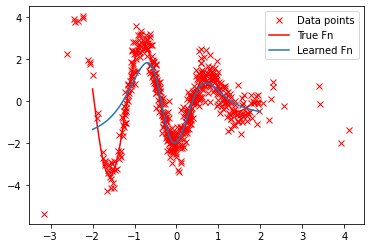

tensor([[-2.0023],
        [-1.1402]])
tensor([[-2.0000],
        [-1.2541]])


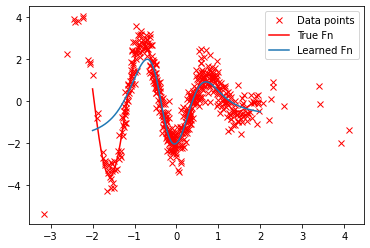

tensor([[-2.0133],
        [-1.1550]])
tensor([[-2.0000],
        [-1.2541]])


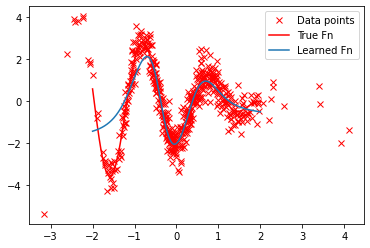

tensor([[-2.0128],
        [-1.1680]])
tensor([[-2.0000],
        [-1.2541]])


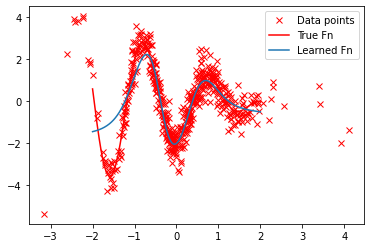

tensor([[-2.0093],
        [-1.1796]])
tensor([[-2.0000],
        [-1.2541]])


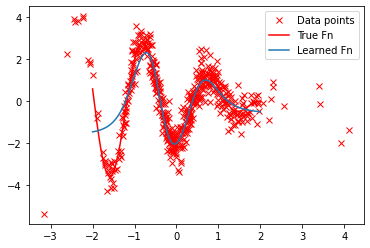

Time elapsed in training is: 5.02544903755188


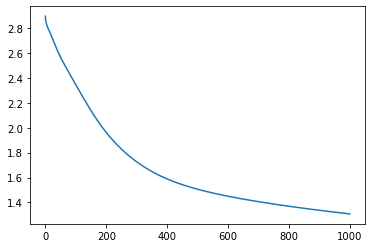

In [178]:
import time, random
start = time.time()
losses = []
for _ in range(1000):
    for batch_x, batch_y in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss(model(batch_x), batch_y)
        train_loss.backward()
        optimizer.step()
    losses.append(train_loss.detach().item())
    if _%100 == 0:
        with torch.no_grad():
            plt.figure(1)
            print(model(torch.tensor([[0.0], [0.2]])))
            print(f_true(torch.tensor([[0.0], [0.2]])))
            xx = torch.linspace(-2, 2, 1024).unsqueeze(1)
            plt.plot(X_train, y_train, 'rx', label='Data points')
            plt.plot(xx, f_true(xx), 'r', label='True Fn')
            plt.plot(xx, model(xx), label='Learned Fn')
            plt.legend()
            plt.show()
end = time.time()
print(f"Time elapsed in training is: {end-start}")
plt.figure(0)
plt.plot(losses)
plt.show()

tensor([[-2.0059],
        [-1.1903]])
tensor([[-2.0000],
        [-1.2541]])


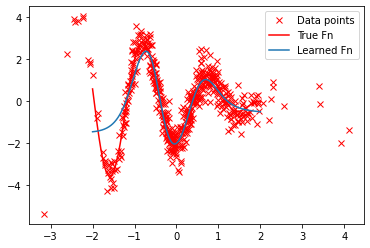

In [179]:
with torch.no_grad():
    plt.figure(1)
    print(model(torch.tensor([[0.0], [0.2]])))
    print(f_true(torch.tensor([[0.0], [0.2]])))
    xx = torch.linspace(-2, 2, 1024).unsqueeze(1)
    plt.plot(X_train, y_train, 'rx', label='Data points')
    plt.plot(xx, f_true(xx), 'r', label='True Fn')
    plt.plot(xx, model(xx), label='Learned Fn')
    plt.legend()
    plt.show()